In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=None

In [3]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

#### Checking Null values

In [5]:
data.isnull().values.any()

False

- No null values present in dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

#### Checking unique values in columns which is having object dtype

In [7]:
data.nunique()[data.dtypes==object]

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

Dropping column Over18, It has only one value

In [8]:
data.drop(columns=['Over18'],inplace=True)

In [9]:
data.columns[data.dtypes==object]

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

#### Encoding the columns having object dtype

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [11]:
for col in data.columns[data.dtypes==object]:
    data[col]=lb.fit_transform(data[col])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1

In [13]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

Dropping the columns which is having single value

In [14]:
data.drop(columns=['StandardHours','EmployeeCount'],inplace=True)

#### Checking duplicated values in dataset

In [15]:
data.duplicated().sum()

0

- No duplicated rows are present in dataset

In [16]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Data Visualization

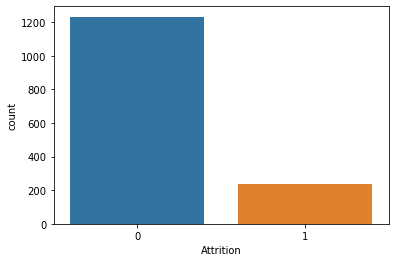

In [17]:
sns.countplot(data.Attrition)

In [30]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### Correlation

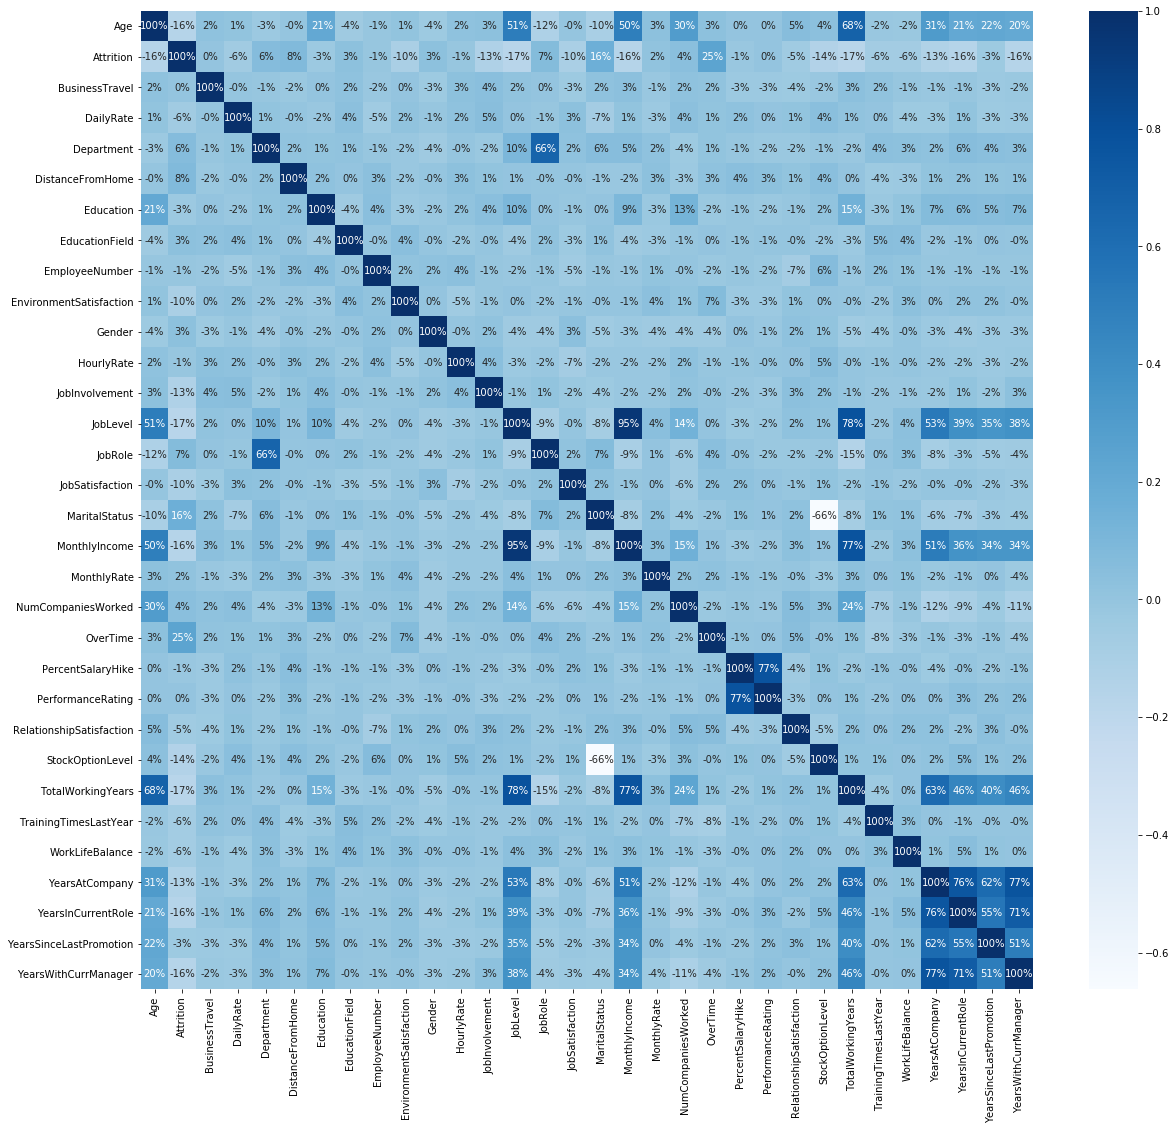

In [31]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,fmt='.0%',cmap='Blues')

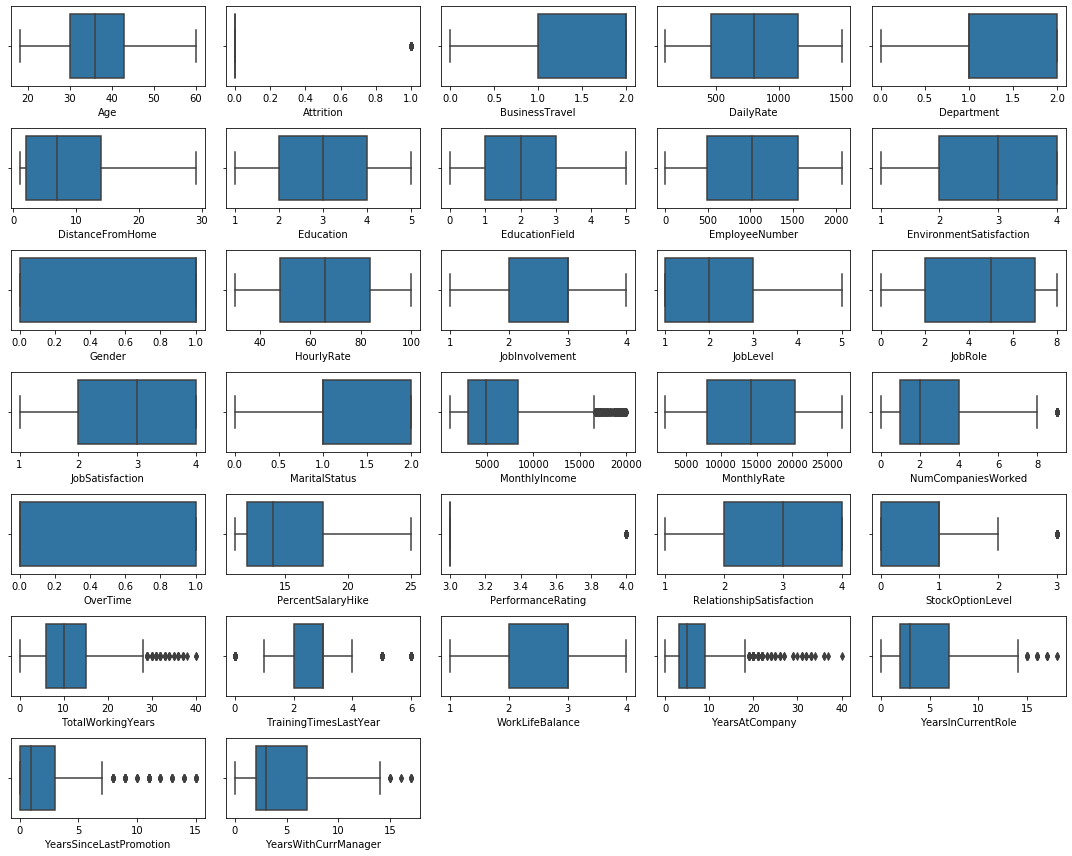

In [32]:
plt.figure(figsize=(15,12))

for x,col in zip(range(len(data.columns)),data.columns):
    
    plt.subplot(7,5,x+1)
    sns.boxplot(data[col])
    plt.tight_layout()

- There are outliers present in some columns

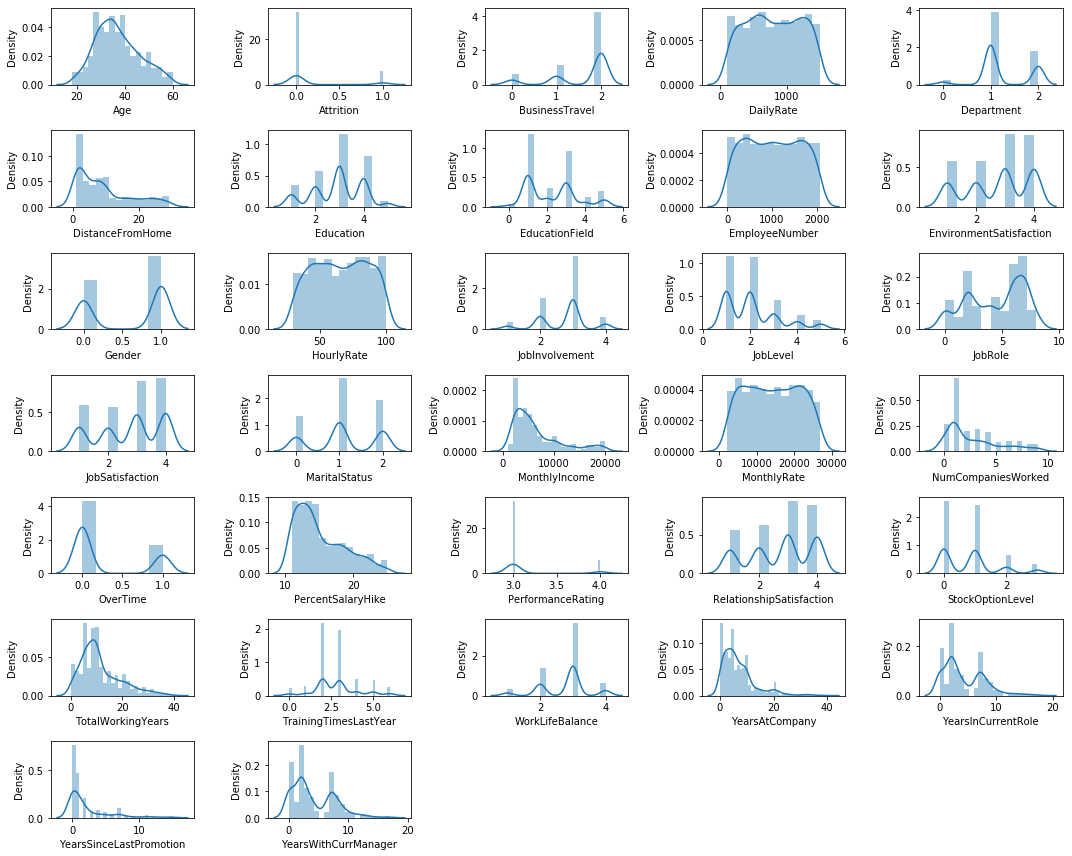

In [33]:
plt.figure(figsize=(15,12))

for x,col in zip(range(len(data.columns)),data.columns):
    
    plt.subplot(7,5,x+1)
    sns.distplot(data[col])
    plt.tight_layout()

In [34]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Handling Unbalanced data using upsampling

In [35]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [36]:
from sklearn.utils import resample

In [38]:
no_Attrition=data[data.Attrition==0]
yes_Attrition=data[data.Attrition==1]

unsapmle_yes=resample(yes_Attrition,n_samples=len(no_Attrition))

In [44]:
new_df=pd.concat([unsapmle_yes,no_Attrition])

In [46]:
new_df.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

#### Splitting data into training and testing

In [48]:
xdata=new_df.drop(columns=['Attrition'])
xdata.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1204,48,1,708,2,7,2,3,1691,4,0,95,3,1,8,3,1,2655,11740,2,1,11,3,3,2,19,3,3,9,7,7,7
838,42,1,481,2,12,3,1,1167,3,1,44,3,4,7,1,2,13758,2447,0,1,12,3,2,0,22,2,2,21,9,13,14
1249,29,2,428,2,9,3,2,1752,2,0,52,1,1,8,2,2,2760,14630,1,0,13,3,3,0,2,3,3,2,2,2,2
1375,32,1,238,1,5,2,1,1939,1,0,47,4,1,6,3,2,2432,15318,3,1,14,3,1,0,8,2,3,4,1,0,3
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [49]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

Scaling the input data

In [50]:
xdata=pd.DataFrame(std.fit_transform(xdata),columns=xdata.columns)
xdata.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.317001,-0.980463,-0.186712,1.304878,-0.339570,-0.837389,0.505893,1.123802,1.245117,-1.250364,1.424271,0.486190,-0.837636,1.346823,0.343261,-0.275798,-0.724796,-0.361426,-0.320304,1.252498,-1.125796,-0.421486,0.306029,1.517431,1.138279,0.193299,0.370486,0.423572,0.910375,1.520746,0.953137
1,0.685189,-0.980463,-0.752149,1.304878,0.271834,0.135750,-0.937175,0.237874,0.356417,0.799767,-1.089444,0.486190,1.975270,0.948160,-1.427621,1.070972,1.803366,-1.663931,-1.085680,1.252498,-0.852869,-0.421486,-0.601023,-0.790299,1.525220,-0.586859,-0.955521,2.350450,1.474229,3.393174,2.950109
2,-0.683737,0.611256,-0.884168,1.304878,-0.095008,0.135750,-0.215641,1.226935,-0.532283,-1.250364,-0.695136,-2.232506,-0.837636,1.346823,-0.542180,1.070972,-0.700887,0.043635,-0.702992,-0.798405,-0.579942,-0.421486,0.306029,-0.790299,-1.054385,0.193299,0.370486,-0.700440,-0.499260,-0.039610,-0.473271
3,-0.367831,-0.980463,-1.357441,-0.534933,-0.584131,-0.837389,-0.937175,1.543096,-1.420983,-1.250364,-0.941579,1.845538,-0.837636,0.549496,0.343261,1.070972,-0.775573,0.140065,0.062385,1.252498,-0.307015,-0.421486,-1.508074,-0.790299,-0.280503,-0.586859,0.370486,-0.379294,-0.781187,-0.663753,-0.187990
4,0.158679,0.611256,1.469744,-0.534933,-0.950973,-0.837389,1.227427,-1.728412,1.245117,0.799767,1.276405,-0.873158,-0.837636,-1.045158,0.343261,1.070972,-0.853447,-1.671079,1.210450,1.252498,-0.034088,-0.421486,-0.601023,-0.790299,-0.409483,0.193299,0.370486,-1.021587,-1.063114,-0.663753,-1.043835


In [51]:
ydata=new_df.Attrition

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### Finding Best random_state

In [58]:
maxacc=0
maxrs=0

for rs in range(1,101):
    xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=rs,stratify=ydata)
    rmodel=RandomForestClassifier()
    rmodel.fit(xtrain,ytrain)
    pred=rmodel.predict(xtest)
    acc=accuracy_score(ytest,pred)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=rs
        
print(f'Best accuracy {maxacc} at random_state {rs}')

Best accuracy 0.9851351351351352 at random_state 100


In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=100,stratify=ydata)

In [60]:
rmodel=RandomForestClassifier()

In [61]:
rmodel.fit(xtrain,ytrain)
rpred=rmodel.predict(xtest)
accuracy_score(ytest,rpred)*100

97.43243243243244

In [62]:
# importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#importing boosting models

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# importing error metrics

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [63]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

model_score={}
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    model_score[model]=pred
    print(f"Metrics evaluation of model {model} :")
    print(f'Accuracy score :\n {accuracy_score(ytest,pred)}\n')
    print(f'Confusion matrix :\n {confusion_matrix(ytest,pred)}\n')
    print(f'Classification report :\n{classification_report(ytest,pred)}\n')
    print('_________________________________________________________\n')

Metrics evaluation of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy score :
 0.754054054054054

Confusion matrix :
 [[264 106]
 [ 76 294]]

Classification report :
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       370
           1       0.73      0.79      0.76       370

    accuracy                           0.75       740
   macro avg       0.76      0.75      0.75       740
weighted avg       0.76      0.75      0.75       740


_________________________________________________________

Metrics evaluation of model GaussianNB(priors=None, var_smoothing=1e-09) :
Accuracy score :
 0.7256756756756757

Confusion matrix :
 [[241 129]
 [ 74 29

#### Cross_cal_score on different models

In [64]:
models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for model in models:
    score=cross_val_score(model,xdata,ydata,cv=5,scoring='accuracy')
    print(f'Model : {model}')
    print(f'Score : {score}')
    print(f'Mean score : {score.mean()}')
    print(f'Standard deivation : {score.std()}\n')
    print('_________________________________________________________\n')

Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score : [0.67611336 0.76064909 0.79310345 0.69776876 0.67748479]
Mean score : 0.7210238891033169
Standard deivation : 0.04736882748619496

_________________________________________________________

Model : GaussianNB(priors=None, var_smoothing=1e-09)
Score : [0.6194332  0.70182556 0.67545639 0.69776876 0.60446247]
Mean score : 0.6597892765929491
Standard deivation : 0.04035992266980934

_________________________________________________________

Model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_i

ExtraTreesClassifier is performing better on both accuracy_score and cross_val_score

#### Best Parameter for ExtraTreesClassifier

In [65]:
grd=GridSearchCV(ExtraTreesClassifier(),
                 {'criterion':['gini','entropy'],'n_estimators':range(80,100)})

grd.fit(xtest,ytest)
grd.best_params_

{'criterion': 'gini', 'n_estimators': 96}

In [66]:
xmodel=ExtraTreesClassifier(criterion='entropy',n_estimators=82)

In [67]:
xmodel.fit(xtrain,ytrain)
ypred=xmodel.predict(xtest)
accuracy_score(ytest,ypred)*100

98.1081081081081

In [80]:
confusion_matrix(ytest,ypred)

array([[365,   5],
       [  9, 361]], dtype=int64)

In [79]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       370
           1       0.99      0.98      0.98       370

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



#### AUC ROC Curve

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score

In [71]:
ypred_prob=xmodel.predict_proba(xtest)[:,1]

In [72]:
ypred_prob

array([1.        , 0.32926829, 1.        , 0.17073171, 1.        ,
       1.        , 1.        , 1.        , 0.07317073, 0.34146341,
       0.17073171, 0.17073171, 1.        , 0.17073171, 0.08536585,
       1.        , 1.        , 0.08536585, 0.14634146, 0.25609756,
       1.        , 0.17073171, 1.        , 1.        , 0.17073171,
       0.19512195, 1.        , 0.1097561 , 0.09756098, 1.        ,
       1.        , 0.02439024, 0.14634146, 0.06097561, 1.        ,
       0.31707317, 0.20731707, 0.08536585, 0.14634146, 1.        ,
       1.        , 0.32926829, 0.07317073, 1.        , 1.        ,
       0.1097561 , 0.06097561, 0.17073171, 1.        , 0.32926829,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.19512195, 0.09756098, 0.08536585, 0.19512195,
       0.12195122, 0.07317073, 1.        , 0.06097561, 0.06097561,
       1.        , 1.        , 0.08536585, 0.03658537, 0.03658537,
       1.        , 1.        , 1.        , 1.        , 1.     

In [73]:
fpr,tpr,thresholds=roc_curve(ytest,ypred_prob)

In [74]:
fpr

array([0.        , 0.        , 0.0027027 , 0.0027027 , 0.00540541,
       0.01351351, 0.01351351, 0.01621622, 0.02702703, 0.03513514,
       0.04054054, 0.05405405, 0.06216216, 0.06756757, 0.08108108,
       0.09459459, 0.11081081, 0.11891892, 0.12972973, 0.16756757,
       0.1972973 , 0.20810811, 0.22432432, 0.23513514, 0.3       ,
       0.34324324, 0.4027027 , 0.44864865, 0.50540541, 0.55135135,
       0.60540541, 0.76756757, 0.81891892, 0.88108108, 0.91081081,
       0.92972973, 0.97027027, 0.98378378, 0.99459459, 1.        ])

In [75]:
tpr

array([0.        , 0.97027027, 0.97027027, 0.97567568, 0.97567568,
       0.97567568, 0.97837838, 0.98108108, 0.98108108, 0.98108108,
       0.98108108, 0.98108108, 0.98108108, 0.98108108, 0.98108108,
       0.98918919, 0.9972973 , 0.9972973 , 0.9972973 , 0.9972973 ,
       0.9972973 , 0.9972973 , 0.9972973 , 0.9972973 , 0.9972973 ,
       0.9972973 , 0.9972973 , 0.9972973 , 0.9972973 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [76]:
thresholds

array([2.        , 1.        , 0.70731707, 0.68292683, 0.63414634,
       0.51219512, 0.48780488, 0.46341463, 0.41463415, 0.40243902,
       0.3902439 , 0.37804878, 0.36585366, 0.35365854, 0.34146341,
       0.32926829, 0.31707317, 0.30487805, 0.29268293, 0.26829268,
       0.25609756, 0.24390244, 0.23170732, 0.2195122 , 0.19512195,
       0.18292683, 0.17073171, 0.15853659, 0.14634146, 0.13414634,
       0.12195122, 0.09756098, 0.08536585, 0.07317073, 0.06097561,
       0.04878049, 0.03658537, 0.02439024, 0.01219512, 0.        ])

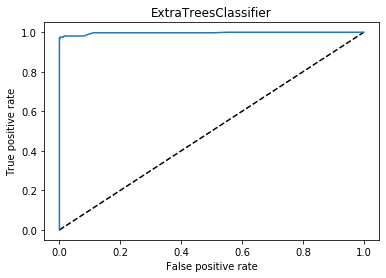

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ExtraTreesClassifier')
plt.show()

In [82]:
roc_auc_score(ytest,ypred)*100

98.10810810810811